In [1]:
#!pip install xgboost
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import model_selection,linear_model, metrics
from scipy.stats import uniform, randint
import xgboost as xgb
import seaborn as sns
import os


In [2]:
credit_df = pd.read_csv("data.csv")

In [3]:
credit_df.shape

(32581, 12)

In [4]:
Nan_per = credit_df.isnull().sum()/credit_df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [5]:
summary = credit_df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.0,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.0,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.0,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.0,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22


In [6]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
print('person_emp_length moda {}'.format(credit_df['person_emp_length'].mode()[0]))
print('loan_int_rate moda {}'.format(credit_df['loan_int_rate'].mode()[0]))
print('person_emp_length mediana {}'.format(credit_df['person_emp_length'].median()))
print('person_emp_length media {}'.format(credit_df['person_emp_length'].mean()))
#print('loan_int_rate mediana {}'.format(credit_df['loan_int_rate'].median()))
#print('loan_int_rate media {}'.format(credit_df['loan_int_rate'].mean()))

person_emp_length moda 0.0
loan_int_rate moda 7.51
person_emp_length mediana 4.0
person_emp_length media 4.789686296787225


In [9]:
credit_df['person_emp_length'].fillna(credit_df['person_emp_length'].mode()[0], inplace=True)
credit_df['loan_int_rate'].fillna(credit_df['loan_int_rate'].mode()[0], inplace=True)

In [10]:
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
num_cols = pd.DataFrame(credit_df[credit_df.select_dtypes(include=['float', 'int64']).columns])
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [12]:
num_cols_hist = num_cols.drop(['loan_status'], axis=1)

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

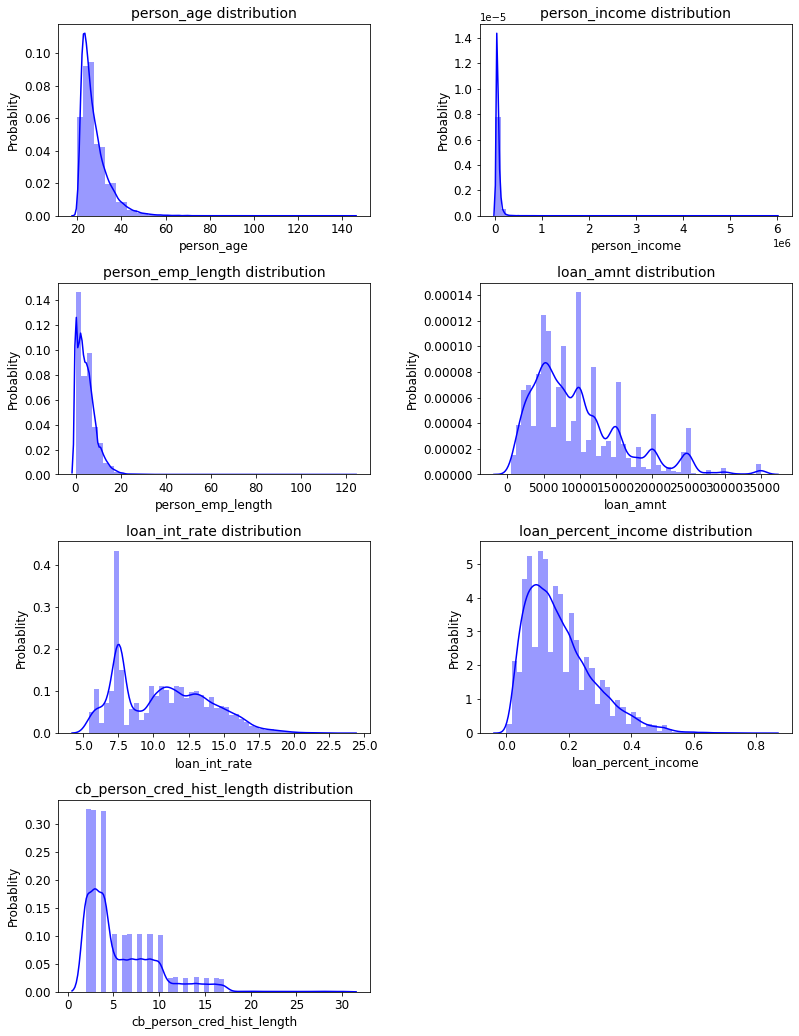

In [13]:

plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='blue')  #,
              #   kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

In [14]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,10.676798,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.249134,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.510000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<AxesSubplot:xlabel='person_age', ylabel='person_income'>

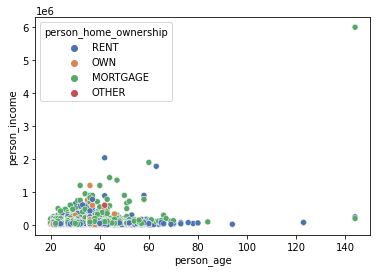

In [15]:
sns.scatterplot( data=credit_df, x="person_age", y="person_income", hue='person_home_ownership', palette="deep")

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_int_rate'>

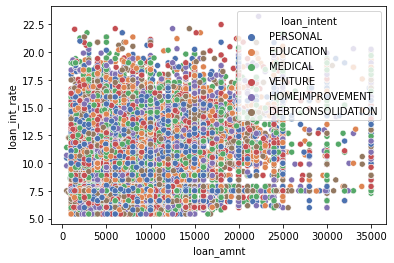

In [16]:

sns.scatterplot( data=credit_df, x="loan_amnt", y="loan_int_rate", hue='loan_intent', palette="deep")

<AxesSubplot:xlabel='loan_amnt', ylabel='person_income'>

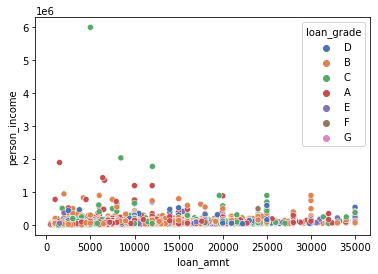

In [17]:

sns.scatterplot( data=credit_df, x="loan_amnt", y="person_income", hue='loan_grade', palette="deep")

<AxesSubplot:xlabel='loan_int_rate', ylabel='person_age'>

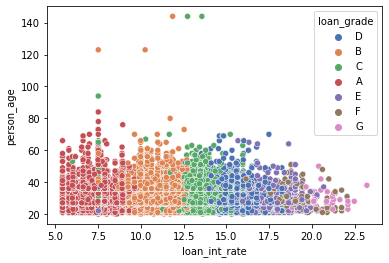

In [18]:

sns.scatterplot( data=credit_df, x="loan_int_rate", y="person_age", hue='loan_grade', palette="deep")

<AxesSubplot:xlabel='person_age', ylabel='person_emp_length'>

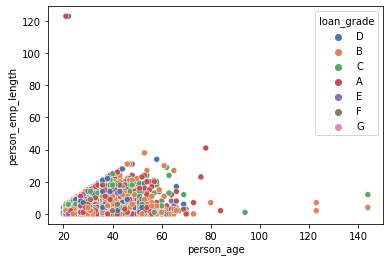

In [19]:
sns.scatterplot( data=credit_df, x="person_age", y="person_emp_length", hue='loan_grade', palette="deep")

In [20]:
credit_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_int_rate'>

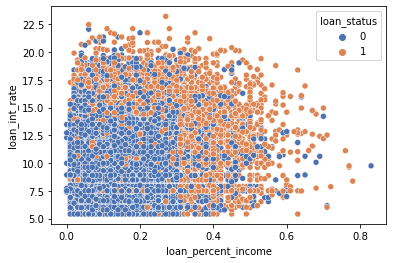

In [21]:
sns.scatterplot( data=credit_df, x="loan_percent_income", y="loan_int_rate", hue='loan_status', palette="deep")

<AxesSubplot:xlabel='person_age', ylabel='person_home_ownership'>

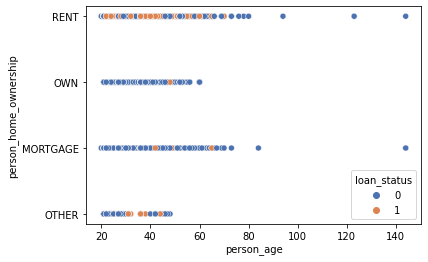

In [22]:
sns.scatterplot( data=credit_df, x="person_age", y="person_home_ownership", hue='loan_status', palette="deep")

<AxesSubplot:xlabel='person_home_ownership', ylabel='Count'>

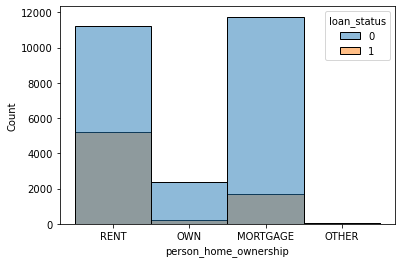

In [23]:
sns.histplot(data=credit_df, x="person_home_ownership", color="skyblue",hue="loan_status", label="Sepal Length")

In [24]:
cleaned_credit_df = credit_df[credit_df['person_income']<=4e6]
cleaned_credit_df = credit_df[credit_df['person_age']<=100]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_emp_length']<=60]

In [25]:
cleaned_num_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['float', 'int64']).columns])

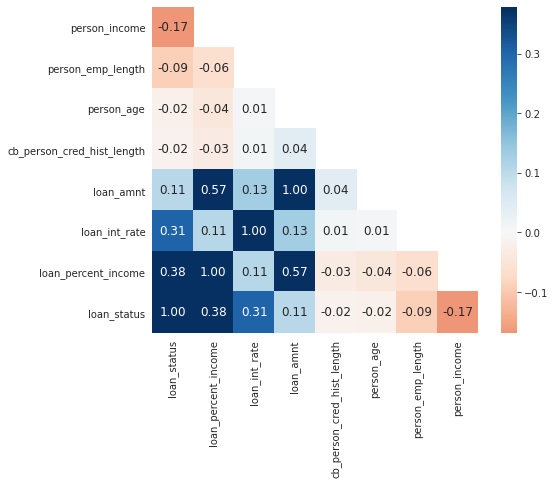

In [26]:
corr = cleaned_num_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

In [27]:
cat_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

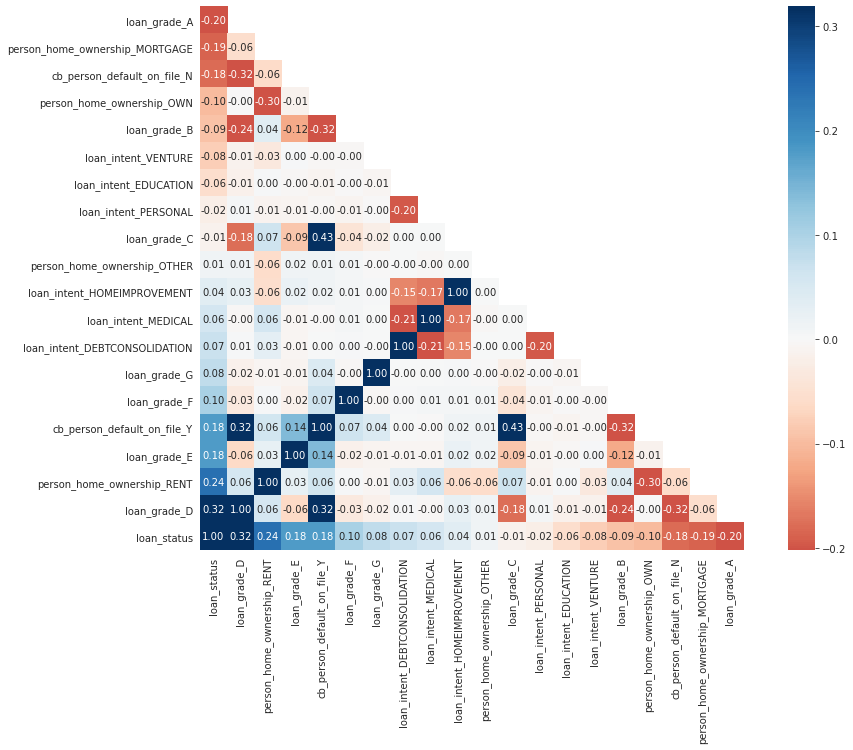

In [28]:
#HAGO ONE HOT ENCODE CON LAS VARIABLES CATEGORICAS
encoded_cat_cols = pd.get_dummies(cat_cols)
cat_cols_corr = pd.concat([encoded_cat_cols, cleaned_credit_df['loan_status']], axis=1)
corr = cat_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [29]:
cleaned_credit_df = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
cleaned_credit_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

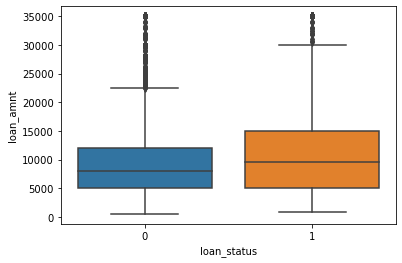

In [30]:
sns.boxplot( x=cleaned_num_cols["loan_status"], y=cleaned_num_cols["loan_amnt"] )

<AxesSubplot:xlabel='loan_status', ylabel='loan_int_rate'>

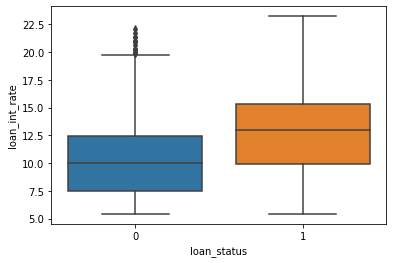

In [31]:
sns.boxplot( x=cleaned_num_cols["loan_status"], y=cleaned_num_cols["loan_int_rate"] )

<AxesSubplot:xlabel='loan_status', ylabel='person_income'>

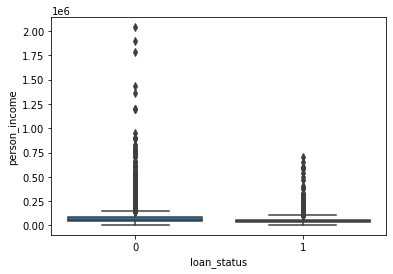

In [32]:
sns.boxplot( x=cleaned_num_cols["loan_status"], y=cleaned_num_cols["person_income"] )

In [33]:
## PARA QUE ESTOS GRAFICOS CORRAN HAY QUE CAMBIAR LA PARTE EN LA QUE EXCLUYO DEL CLEANED DATASET LAS VARIBALES OBJECT
sns.scatterplot( data=cleaned_num_cols, x="person_age", y="person_income", hue='person_home_ownership', palette="deep")

ValueError: Could not interpret value `person_home_ownership` for parameter `hue`

In [ ]:
sns.scatterplot( data=cleaned_num_cols, x="loan_amnt", y="loan_int_rate", hue='loan_intent', palette="deep")


In [ ]:
sns.scatterplot( data=cleaned_num_cols, x="loan_amnt", y="person_income", hue='loan_grade', palette="deep")


In [ ]:
sns.scatterplot( data=cleaned_num_cols, x="loan_int_rate", y="person_age", hue='loan_grade', palette="deep")

In [ ]:
credit_df.columns

In [ ]:
sns.lmplot( x="loan_int_rate", y="loan_percent_income", data=credit_df, fit_reg=False, hue='loan_status', legend=False)

In [ ]:
uniqueValues = credit_df["person_home_ownership"].unique()
print('Unique elements in column "Age" ')
print(uniqueValues)

In [ ]:
pd.crosstab(cleaned_credit_df['loan_status'], cleaned_credit_df['loan_grade'], 
            values = cleaned_credit_df['loan_int_rate'], aggfunc = 'median')

In [ ]:
pd.crosstab(cleaned_credit_df['loan_status'], cleaned_credit_df['loan_intent'], 
            values = cleaned_credit_df['loan_int_rate'], aggfunc = 'median')

In [34]:
# check the cleaned dataset size 
print ('The cleaned dataset has {} rows and {} columns'.format(cleaned_credit_df.shape[0], 
                                                               cleaned_credit_df.shape[1]))
print ('The cleaned dataset has {} numerical features and {} categorical features'
       .format(len(cleaned_num_cols.columns)-1, len(encoded_cat_cols.columns)))

The cleaned dataset has 32574 rows and 27 columns
The cleaned dataset has 7 numerical features and 19 categorical features


In [35]:
# Split Train and Test Sets
Y = cleaned_credit_df['loan_status']
X = cleaned_credit_df.drop('loan_status',axis=1)
 


x_train, f, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.30)

#Start of Classification Logistics Regression

log_clf = linear_model.LogisticRegression()

log_clf.fit(x_train, np.ravel(y_train))

LogisticRegression()

In [36]:
col_effect = pd.DataFrame()
col_effect['col_names'] = X.columns
col_effect['col_coef'] = log_clf.coef_[0]
col_effect

,col_names,col_coef
0,person_age,-4.446555e-08
1,person_income,-4.212723e-05
2,person_emp_length,-2.377918e-08
3,loan_amnt,1.137358e-04
4,loan_int_rate,8.918950e-08
5,loan_percent_income,2.774925e-09
6,cb_person_cred_hist_length,-7.630153e-09
7,person_home_ownership_MORTGAGE,-6.567286e-09
8,person_home_ownership_OTHER,6.082774e-11
9,person_home_ownership_OWN,-4.006221e-09


In [37]:
# Split Train and Test Sets
label = cleaned_credit_df['loan_status'] # labels
features = cleaned_credit_df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)
print('La base de entrenamiento tiene {} y la base de testeo tiene {} datos'.
      format(x_train.shape[0], x_test.shape[0]))


La base de entrenamiento tiene 22801 y la base de testeo tiene 9773 datos


In [38]:
#ME EQUIVOQUE EN LO QUE DIJE PARA EL FINAL. ACA ENTRENO EL MODELO CON TRAIN Y DESPUES PRUEBO LOS MODELOS CON LA BASE TEST

def model_assess(model, name='Default'):
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    preds_proba = model.predict_proba(x_test)
    print(name, '\n',classification_report(y_test, model.predict(x_test)))

In [39]:
#KNN
knn = KNeighborsClassifier(n_neighbors=150)
model_assess(knn, name='KNN')
#Logistic Regression
lg = LogisticRegression(random_state=42)
model_assess(lg, 'Logistic Regression')
# Dicision trees
D_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
model_assess(D_tree, 'DecisionTree Classifier')
#XGB
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
model_assess(xgb, 'XGBoost')

KNN 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7631
           1       0.74      0.39      0.51      2142

    accuracy                           0.84      9773
   macro avg       0.79      0.67      0.70      9773
weighted avg       0.82      0.84      0.81      9773

Logistic Regression 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      7631
           1       0.74      0.15      0.25      2142

    accuracy                           0.80      9773
   macro avg       0.77      0.57      0.57      9773
weighted avg       0.79      0.80      0.75      9773

DecisionTree Classifier 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7631
           1       0.96      0.73      0.83      2142

    accuracy                           0.93      9773
   macro avg       0.94      0.86      0.89      9773
weighted avg       0

C:\Users\Windows\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      7631
           1       0.96      0.76      0.85      2142

    accuracy                           0.94      9773
   macro avg       0.95      0.87      0.90      9773
weighted avg       0.94      0.94      0.94      9773



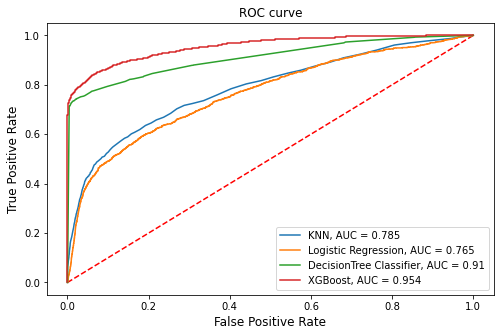

In [40]:
#ROC AUC
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

#KNN
preds_proba_knn = knn.predict_proba(x_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')

#Logistic Regression
preds_proba_lg = lg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#DecisionTree Classifier
preds_proba_D_tree = D_tree.predict_proba(x_test)
probsD_tree = preds_proba_D_tree[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsD_tree)
auclg = roc_auc_score(y_test, probsD_tree)
plt.plot(fpr, tpr, label=f'DecisionTree Classifier, AUC = {str(round(auclg,3))}')

#XGBoost
preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 16
plt.legend()
plt.show()

In [41]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 
                                   'importance': xgb.feature_importances_})

new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

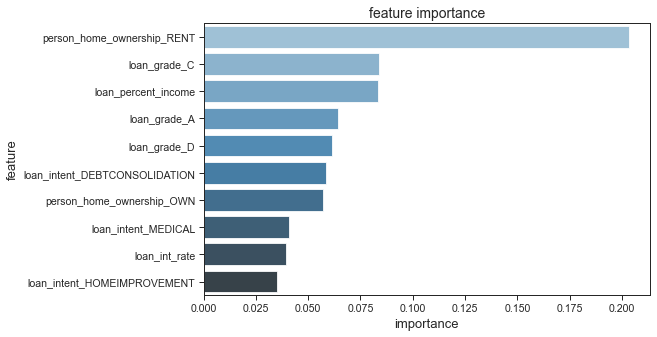

In [42]:
sns.set(context='paper', style='ticks',  font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df[:10],
              y='feature',
              x='importance',
              palette='Blues_d') # rocket, Blues_d
ax.set_title('feature importance', fontsize=14)
ax.set_xlabel('importance', fontsize=13)
ax.set_ylabel('feature', fontsize=13)
plt.show()

In [43]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)